In [1]:
# import lime
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from __future__ import print_function

# Loading required packages
import spacy
import pandas as pd
import re
# import gensim
# import gensim.downloader
# from gensim.models import Word2Vec
# from gensim.test.utils import common_texts
# from gensim.models import Word2Vec
# from gensim.models.phrases import Phrases, Phraser
import nltk
from numpy import mean
from numpy import std
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from statistics import mean
import json
import csv
import ast
import numpy as np

# from flair.embeddings import WordEmbeddings
# from flair.data import Sentence
# from flair.embeddings import TransformerWordEmbeddings

from tqdm import tqdm
import pickle 
# Set seed
seed = np.random.seed(1)


# Select Spacy model
# Efficiency
nlp = spacy.load("en_core_web_sm")

# Accuracy
# nlp = spacy.load("en_core_web_trf")

# Change working directory
# %cd '/Users/richardfrissen/Documents/Maastricht University/Thesis/Development/Datasets'

2021-07-27 17:01:51.617430: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-27 17:01:51.617501: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
class_names=['Demographic and Racial language', 'Exclusive language', 'Feminine-coded words', 'LGBTQ-coloured language', 'Masculine-coded words', 'O']

In [3]:
%%time

# Optionally the data can be saved to create a checkpoint

# data.to_csv('data_features_full_wordembedding_glove.csv', index = False)

data = pd.read_csv('data_features_full_wordembedding_bert.csv', nrows = 100000, na_values=['nan'])

data.head(10)

CPU times: user 15 s, sys: 1.22 s, total: 16.2 s
Wall time: 18 s


,Token,Label,pos,ent_type,is_alpha,is_ascii,is_digit,is_lower,is_upper,is_title,...,758,759,760,761,762,763,764,765,766,767
0,food,O,92,0,True,True,False,True,False,False,...,0.078347,-0.213393,-0.360482,0.599680,0.611853,0.220767,0.342419,0.055093,0.177906,0.719633
1,a,O,90,0,True,True,False,True,False,False,...,0.005257,0.682079,-0.566330,0.124105,0.314677,-0.002286,0.631670,0.115115,1.044015,0.560535
2,fast,O,86,0,True,True,False,True,False,False,...,0.577659,0.032252,-0.028243,0.251337,-1.222422,1.028620,0.959377,-0.790838,0.316029,0.436458
3,grow,O,100,0,True,True,False,True,False,False,...,-0.717857,-0.141034,-0.484016,0.332784,0.141271,0.088913,-0.936067,-0.500807,0.084751,0.278871
4,-winne,O,97,0,False,True,False,True,False,False,...,0.076417,0.086553,-0.706749,0.188063,0.195960,0.284505,0.606089,0.832055,0.249324,0.395537
5,online,O,86,0,True,True,False,True,False,False,...,0.015824,-0.081609,-0.880314,0.047720,-0.266453,0.458979,0.197704,-0.666143,0.375859,0.119397
6,food,O,92,0,True,True,False,True,False,False,...,0.078347,-0.213393,-0.360482,0.599680,0.611853,0.220767,0.342419,0.055093,0.177906,0.719633
7,community,O,92,0,True,True,False,True,False,False,...,-0.400877,0.182614,-1.512862,0.898749,-1.064716,-0.387649,-0.566761,-0.220441,-0.061128,-0.138970
8,and,O,89,0,True,True,False,True,False,False,...,0.209402,0.291369,-0.166621,0.138620,0.343412,0.192610,0.490048,-0.279343,0.030398,0.067056
9,crowd,O,92,0,True,True,False,True,False,False,...,0.374465,0.081873,-0.957627,-0.046060,-0.142485,0.079933,0.037512,-0.538567,-0.155005,0.147617


In [4]:
data["Label"] = data["Label"].astype('category').cat.codes

In [5]:
%%time

# Replace NaN values with a "0"

data = data.replace(np.nan, '0', regex=True)

# We drop the token, as it is no longer needed for prediction
data.drop('Token', axis=1, inplace=True)
data.head(10)

# data = data.stack().str.decode('utf-8').unstack()

CPU times: user 7.61 s, sys: 1.99 s, total: 9.6 s
Wall time: 9.7 s


,Label,pos,ent_type,is_alpha,is_ascii,is_digit,is_lower,is_upper,is_title,is_punct,...,758,759,760,761,762,763,764,765,766,767
0,5,92,0,True,True,False,True,False,False,False,...,0.078347,-0.213393,-0.360482,0.59968,0.611853,0.220767,0.342419,0.055093,0.177906,0.719633
1,5,90,0,True,True,False,True,False,False,False,...,0.005257,0.682079,-0.56633,0.124105,0.314677,-0.002286,0.63167,0.115115,1.044015,0.560535
2,5,86,0,True,True,False,True,False,False,False,...,0.577659,0.032252,-0.028243,0.251337,-1.222422,1.02862,0.959377,-0.790838,0.316029,0.436458
3,5,100,0,True,True,False,True,False,False,False,...,-0.717857,-0.141034,-0.484016,0.332784,0.141271,0.088913,-0.936067,-0.500807,0.084751,0.278871
4,5,97,0,False,True,False,True,False,False,False,...,0.076417,0.086553,-0.706749,0.188063,0.19596,0.284505,0.606089,0.832055,0.249324,0.395537
5,5,86,0,True,True,False,True,False,False,False,...,0.015824,-0.081609,-0.880314,0.04772,-0.266453,0.458979,0.197704,-0.666143,0.375859,0.119397
6,5,92,0,True,True,False,True,False,False,False,...,0.078347,-0.213393,-0.360482,0.59968,0.611853,0.220767,0.342419,0.055093,0.177906,0.719633
7,5,92,0,True,True,False,True,False,False,False,...,-0.400877,0.182614,-1.512862,0.898749,-1.064716,-0.387649,-0.566761,-0.220441,-0.061128,-0.13897
8,5,89,0,True,True,False,True,False,False,False,...,0.209402,0.291369,-0.166621,0.13862,0.343412,0.19261,0.490048,-0.279343,0.030398,0.067056
9,5,92,0,True,True,False,True,False,False,False,...,0.374465,0.081873,-0.957627,-0.04606,-0.142485,0.079933,0.037512,-0.538567,-0.155005,0.147617


In [6]:
%%time

# 80% / 20% split
# Train, Test = train_test_split(data1, test_size=0.2, shuffle=False)

X = data.drop(['Label'],axis=1).values # independant features
y = data['Label'].values # dependant variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

CPU times: user 3.65 s, sys: 2.15 s, total: 5.8 s
Wall time: 5.83 s


In [7]:
max_iterations = 1000000000

In [8]:
# Optionally the data can be saved to create a checkpoint - RF

import pickle

# f = open('bert_rf.pckl', 'wb')
# pickle.dump(clf, f)
# f.close()

f = open('bert_rf.pckl', 'rb')
clf = pickle.load(f)
f.close()

In [9]:
type(X)

numpy.ndarray

In [10]:
X_featurenames = (pd.DataFrame(X_train)).columns

In [11]:
len(X_featurenames)

784

In [12]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [ ]:
# %time
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(X_train, check_additivity=False)

In [15]:
import shap

In [ ]:
%time
shap_values = shap.TreeExplainer(clf).shap_values(X_train, check_additivity=False)

CPU times: user 7 µs, sys: 6 µs, total: 13 µs
Wall time: 25.5 µs


2021-07-27 07:59:14.356270: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-27 07:59:14.356345: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 22.4 µs


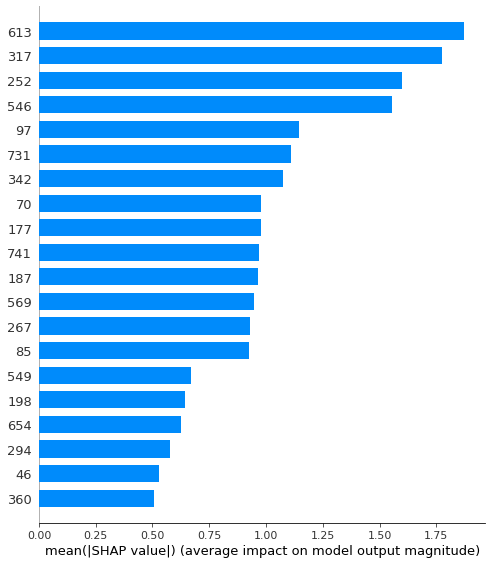

In [16]:
%time
shap.summary_plot(shap_values[0], X_train, plot_type="bar")

CPU times: user 6 µs, sys: 5 µs, total: 11 µs
Wall time: 31.5 µs


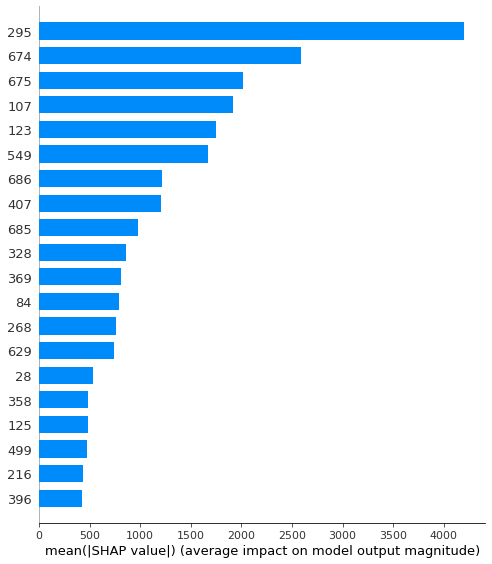

In [17]:
%time
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

CPU times: user 6 µs, sys: 5 µs, total: 11 µs
Wall time: 20 µs


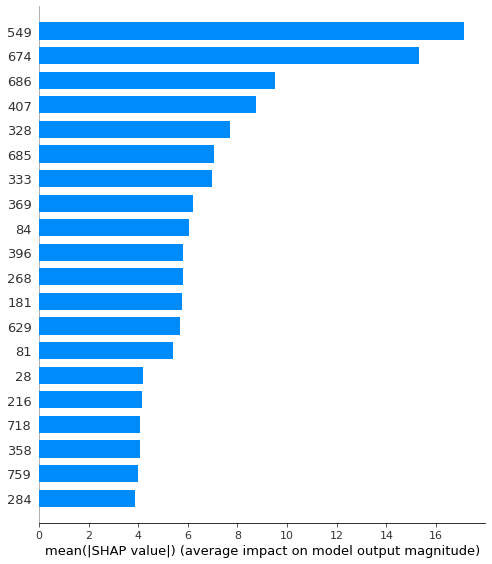

In [18]:
%time
shap.summary_plot(shap_values[2], X_train, plot_type="bar")

CPU times: user 6 µs, sys: 5 µs, total: 11 µs
Wall time: 21 µs


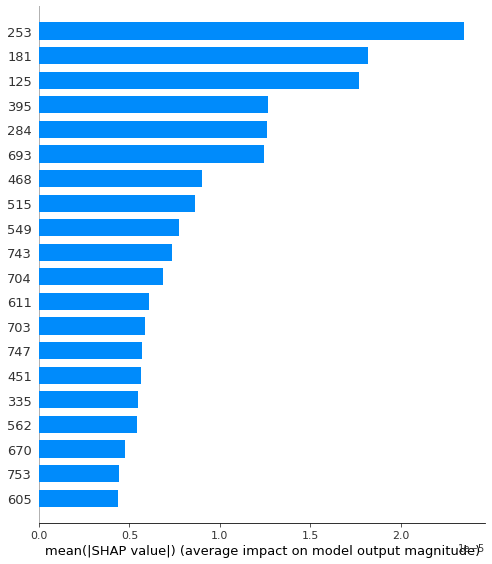

In [19]:
%time
shap.summary_plot(shap_values[3], X_train, plot_type="bar")

CPU times: user 0 ns, sys: 11 µs, total: 11 µs
Wall time: 21.2 µs


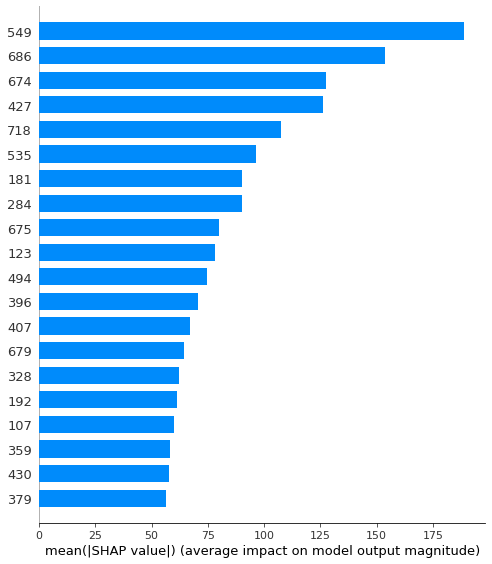

In [20]:
%time
shap.summary_plot(shap_values[4], X_train, plot_type="bar")

CPU times: user 6 µs, sys: 5 µs, total: 11 µs
Wall time: 21 µs


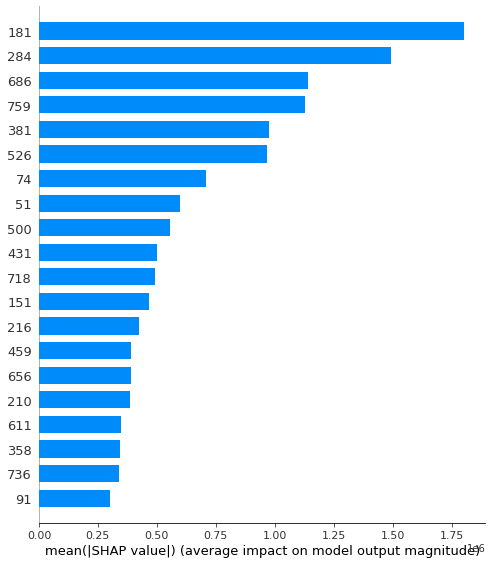

In [21]:
%time
shap.summary_plot(shap_values[5], X_train, plot_type="bar")

CPU times: user 5 µs, sys: 5 µs, total: 10 µs
Wall time: 20 µs


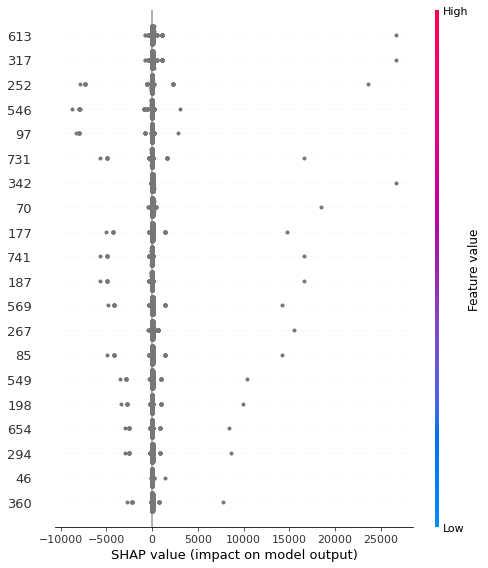

In [22]:
%time
shap.summary_plot(shap_values[0], X_train, feature_names = X_train.columns)

CPU times: user 0 ns, sys: 11 µs, total: 11 µs
Wall time: 31.7 µs


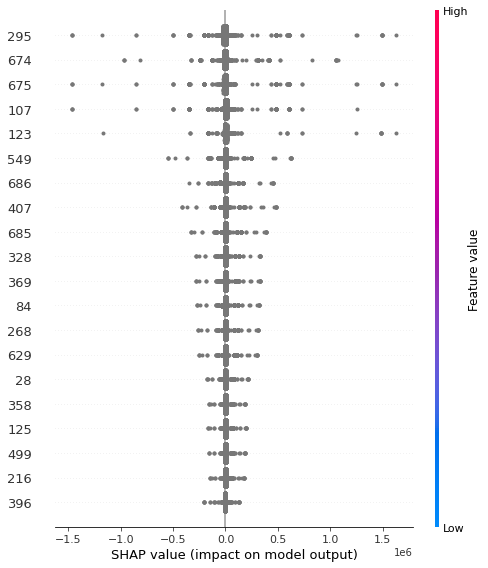

In [23]:
%time
shap.summary_plot(shap_values[1], X_train, feature_names = X_train.columns)

CPU times: user 7 µs, sys: 5 µs, total: 12 µs
Wall time: 25.5 µs


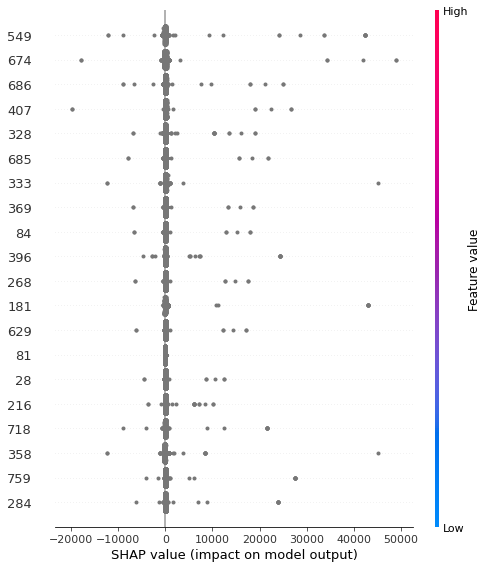

In [24]:
%time
shap.summary_plot(shap_values[2], X_train, feature_names = X_train.columns)

CPU times: user 6 µs, sys: 5 µs, total: 11 µs
Wall time: 27.2 µs


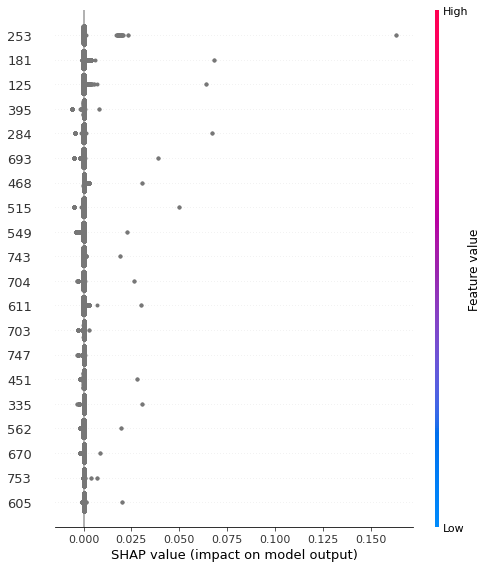

In [25]:
%time
shap.summary_plot(shap_values[3], X_train, feature_names = X_train.columns)

CPU times: user 6 µs, sys: 5 µs, total: 11 µs
Wall time: 26 µs


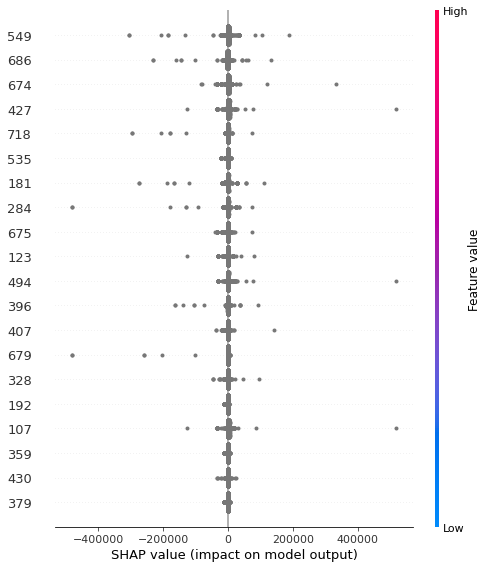

In [26]:
%time
shap.summary_plot(shap_values[4], X_train, feature_names = X_train.columns)

CPU times: user 6 µs, sys: 4 µs, total: 10 µs
Wall time: 21.9 µs


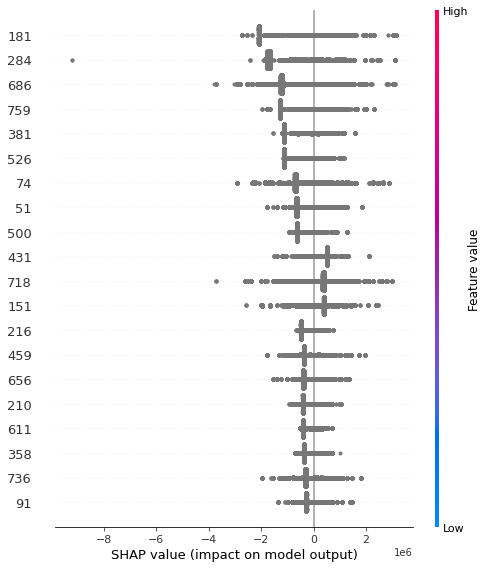

In [27]:
%time
shap.summary_plot(shap_values[5], X_train, feature_names = X_train.columns)

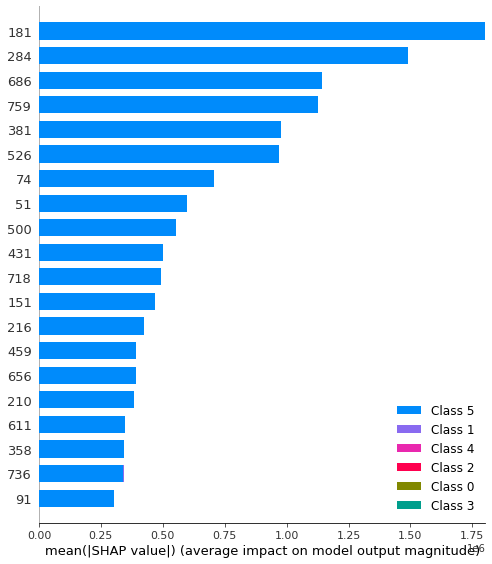

In [28]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [13]:
# Optionally the data can be saved to create a checkpoint - Shap RF

import pickle

# f = open('shap_values_bert_rf.pckl', 'wb')
# pickle.dump(shap_values, f)
# f.close()

f = open('shap_values_bert_rf.pckl', 'rb')
shap_values = pickle.load(f)
f.close()